In [5]:
import numpy as np

from tools.corner_response_function import convolve,\
    difference_of_Gaussian_filters
from tools.data_loading import load_images, load_labels, dummy_code
from tools.visualization import imshow, reshape_as_images

# Data loading

In [6]:
X_train = load_images(type="train")
n_train = X_train.shape[0]
Y_labels_train = load_labels()
Y_train = dummy_code(Y_labels_train)
n_classes = Y_train.shape[1]

In [7]:
image_list = reshape_as_images(X_train)

# Gradient computation

In [114]:
filter_sigma=1
filter_shape=5

In [115]:
im_id = 1
image = image_list[im_id,:,:,:]

## Gaussian filters

In [116]:
filterx, filtery = difference_of_Gaussian_filters(
        shape=(filter_shape, filter_shape),
        sigma=filter_sigma)

## Gradient

In [117]:
im_size = image.shape[0]
n_colors = image.shape[2]

In [118]:
image_grad_x = np.zeros((n_colors, im_size**2))
image_grad_y = np.zeros((n_colors, im_size**2))

for c in range(n_colors):
    grad_x, grad_y = convolve(image[:, :, c], filterx, filtery)
    image_grad_x[c, :] = grad_x.reshape((im_size**2,))
    image_grad_y[c, :] = grad_y.reshape((im_size**2,))

image_grad_n = np.sqrt(image_grad_x**2 + image_grad_y**2)
best_colors = np.argmax(image_grad_n, axis=0)
image_grad_x = image_grad_x[
    best_colors, np.arange(im_size**2)].reshape((im_size, im_size))
image_grad_y = image_grad_y[
    best_colors, np.arange(im_size**2)].reshape((im_size, im_size))

# Visualization

## Original image

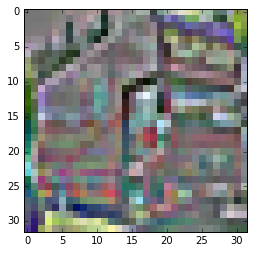

In [119]:
imshow(image)

## Gradient

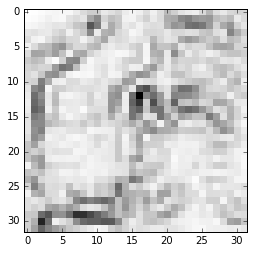

In [120]:
imshow(np.sqrt(image_grad_x**2 + image_grad_y**2))